In [5]:
import numpy as np
import matplotlib.pyplot as plt
p2000_path="/Users/pjiao/data/aramco_1008x1008x352/pressure_2000.f32.dat"
p2000=np.fromfile(p2000_path,dtype=np.float32).reshape(1008,1008,352)
p2000_reg = np.fromfile("test.out",dtype=np.float32).reshape(1008,1008,352)
p2000_max = np.max(p2000)
p2000_min = np.min(p2000)
p2000_range = p2000_max - p2000_min


In [6]:
p2000 = (p2000 - p2000_min) / p2000_range
p2000_reg = (p2000_reg - p2000_min) / p2000_range
p2000_reg[p2000_reg<0] = 0
p2000_reg[p2000_reg>1] = 1

In [2]:
def plot3(data1, data2, idx, idy, window, same_scale=False):
    fig, axs = plt.subplots(1, 3, figsize=(8, 6))
    original = data1[idx-window:idx+window+1,idy-window:idy+window+1].copy()
    decompresss = data2[idx-window:idx+window+1,idy-window:idy+window+1].copy()
    original = original.astype(np.float32)
    decompresss = decompresss.astype(np.float32)
    error = original -decompresss
    
    # decompresss = original - decompresss
    print("original.shape",original.shape)
    original.tofile("original.bin")
    decompresss.tofile("decompresss.bin")
    color = 'coolwarm'
    if same_scale == 1:
        vmax = original.max()
        vmin = original.min()
        im1 = axs[0].imshow(original, vmax=vmax, vmin=vmin, interpolation='none', cmap=color)
        axs[0].set_title('Original')
        im2 = axs[1].imshow(decompresss, vmax=vmax, vmin=vmin, interpolation='none', cmap=color)
        axs[1].set_title('Decompressed')
        im3 = axs[2].imshow(error,interpolation='none', cmap=color)
        axs[2].set_title('Error')
    elif same_scale == 2:
        vmax = data1.max()
        vmin = data1.min()
        im1 = axs[0].imshow(original, vmax=vmax, vmin=vmin, interpolation='none', cmap=color)
        axs[0].set_title('orig')
        im2 = axs[1].imshow(decompresss, vmax=vmax, vmin=vmin, interpolation='none', cmap=color)
        axs[1].set_title('decompressed')
        im3 = axs[2].imshow(error,interpolation='none', cmap=color)
        axs[2].set_title('Error')
    else:
        im1 = axs[0].imshow(original, interpolation='none', cmap=color)
        axs[0].set_title('orig')
        im2 = axs[1].imshow(decompresss, interpolation='none', cmap=color)
        axs[1].set_title('decompressed')
        im3 = axs[2].imshow(error,interpolation='none', cmap=color)
        axs[2].set_title('Error')

In [19]:
# dmap = np.fromfile("cp_map.dat",dtype=np.int32).reshape(1008,1008,352)
# omap = np.fromfile("cp_map_orig.dat",dtype=np.int32).reshape(1008,1008,352)
emap = np.fromfile("cp_map_error.dat",dtype=np.int32).reshape(1008,1008,352)
match_index = np.fromfile("match_index.dat",dtype=np.int32)
print("match_index.size",match_index.size)

match_index.size 908


140739709
396 660 253
original.shape (21, 21)
original.shape (21, 21)
original.shape (21, 21)
emap
 [[ 4 -4 -2]
 [-4 -6 -4]
 [-2 -4 -2]]
emap
 [[ 4 -4  2]
 [-4 -6 -4]
 [-2 -4 -2]]
emap
 [[ 4 -4 -2]
 [-4 -6 -4]
 [ 0 -4 -2]]


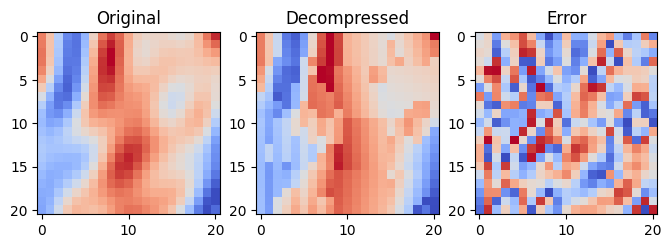

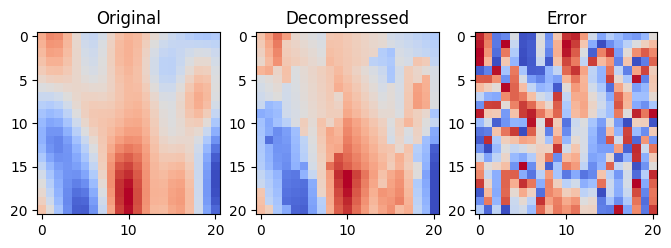

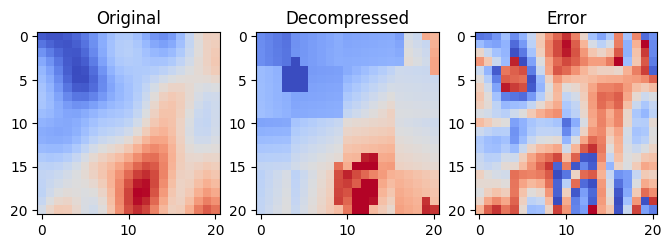

In [20]:
id = 300
index = match_index[id]
print(index)
idx = index//(1008*352)
idy = (index//352)%1008
idz = index%352
print(idx,idy,idz)

win = 10
plot3(p2000[idx],p2000_reg[idx],idy,idz,win,1)

plot3(p2000[:,idy,:],p2000_reg[:,idy,:],idx,idz,win,1)

plot3(p2000[:,:,idz],p2000_reg[:,:,idz],idx,idy,win,1)
mapwin = 1
print("emap\n",emap[idx-mapwin:idx+mapwin+1,idy-mapwin:idy+mapwin+1,idz])
print("emap\n",emap[idx,idy-mapwin:idy+mapwin+1,idz-mapwin:idz+mapwin+1])
print("emap\n",emap[idx-mapwin:idx+mapwin+1,idy,idz-mapwin:idz+mapwin+1])

In [16]:
error = p2000 - p2000_reg

In [17]:
print("dmap\n",error[idx-mapwin:idx+mapwin+1,idy-mapwin:idy+mapwin+1,idz])
print("dmap\n",error[idx,idy-mapwin:idy+mapwin+1,idz-mapwin:idz+mapwin+1])
print("dmap\n",error[idx-mapwin:idx+mapwin+1,idy,idz-mapwin:idz+mapwin+1])

dmap
 [[-2.5397539e-04 -6.2865019e-04 -4.4405460e-05]
 [-9.5230341e-04 -1.3120174e-03 -6.4426661e-04]
 [-1.7452240e-04 -3.8999319e-04  5.3232908e-04]]
dmap
 [[-0.00031382 -0.0009523  -0.00066835]
 [-0.0006907  -0.00131202 -0.00098956]
 [-0.00012887 -0.00064427 -0.00017345]]
dmap
 [[ 6.8545341e-06 -6.2865019e-04 -3.7473440e-04]
 [-6.9069862e-04 -1.3120174e-03 -9.8955631e-04]
 [ 1.8239021e-04 -3.8999319e-04  1.0728836e-03]]


In [18]:
print("dmap\n",p2000_reg[idx-mapwin:idx+mapwin+1,idy-mapwin:idy+mapwin+1,idz])
print("dmap\n",p2000_reg[idx,idy-mapwin:idy+mapwin+1,idz-mapwin:idz+mapwin+1])
print("dmap\n",p2000_reg[idx-mapwin:idx+mapwin+1,idy,idz-mapwin:idz+mapwin+1])

dmap
 [[0.5438205  0.5437505  0.54249054]
 [0.5437505  0.54368055 0.5423622 ]
 [0.5419305  0.5417322  0.5401921 ]]
dmap
 [[0.5432372  0.5437505  0.5429805 ]
 [0.54316723 0.54368055 0.5428755 ]
 [0.5419422  0.5423622  0.5414172 ]]
dmap
 [[0.5432372  0.5437505  0.5429922 ]
 [0.54316723 0.54368055 0.5428755 ]
 [0.5412422  0.5417322  0.5398305 ]]
